Dieses Notebook ist eine grundlegende Einführung zu Deep Learning, also Machine Learning mit neuronalen Netzen, am Beispiel des MNIST-Datensatzes.

Der MNIST-Datensatz besteht aus 70,000 Bildern (jeweils 28x28 Pixel, siehe Abb. links) von jeweils einer handgeschriebenen Ziffer (0 bis 9). Die Aufgabe, die mit diesem Datensatz verbunden ist, ist die automatische Erkennung der Ziffern.

Neuronale Netze (siehe Abb. rechts) sind Modelle, bestehend aus Neuronen (Abb.: Kreise) und anpassungsfähigen Neuronenverknüpfungen (Abb.: Linien), die in der Lage sind abstrakte Strukturen in Daten zu erkennen. In diesem Fall sind die Grauwerte der 28 x 28 = 784 Pixel das Eingangssignal (-vektor) des neuronalen Netzes und das Ziel wäre im Abbildungsbeispiel das Aufleuchten des "3-er-Neurons".

<img src="mnist_net.png" style="width:800px;height:400px;">

Wie alle Machine Learning Modelle, "lernen" neuronale Netze selbstständig durch das Training auf vielen Beispielsamples (hier 60,000 Samples).
Beim Training werden die Verknüpfungsstärken des Netzes (Weights und Biases) schrittweise so angepasst, dass für möglichst viele Beispielbilder die richtige Lösung rauskommt.
Um [Overfitting](https://de.wikipedia.org/wiki/%C3%9Cberanpassung) zu vermeiden, wird ein Teil der Daten (hier 10,000 Bilder) nicht zum Training sondern zur Validierung des Modells verwendet.

Im Folgenden wird ein einfaches neuronales Netz auf dem MNIST-Datensatz trainiert und anschließend evaluiert. Dazu wird [PyTorch](https://pytorch.org/) verwendet, da dies das aktuell populärste Package zur Implementierung neuronaler Netze ist.

<img src="pytorch.png" style="width:600px;height:400px;">

Zusätzlich zu PyTorch wird Version 2 von [fastai](https://docs.fast.ai/) (Installationsanleitung inkl. PyTorch im Link) verwendet, weil es das Training und die Validierung neuronaler Netze deutlich erleichtert.

Packages werden importiert

In [12]:
from fastai.basics import *
from fastai.vision.all import *

MNIST-Daten werden heruntergeladen und als [ImageDataLoader-Objekt](https://docs.fast.ai/vision.data.html#ImageDataLoaders) geladen

'training' und 'testing' sind die Bezeichnung der Unterordner in denen die jeweiligen Bilder liegen

bs, die batch size zeigt nach wie vielen Bilder die Verknüpfungsstärken des Netzes aktualisiert werden

In [13]:
path = untar_data(URLs.MNIST)
data = ImageDataLoaders.from_folder(path, train='training', valid='testing', bs=64)

Mit .show_batch() wird ein Ausschnitt eines Batches des ImageDataLoader geplottet um zu überprüfen ob die Daten wie vorgesehen geladen wurden

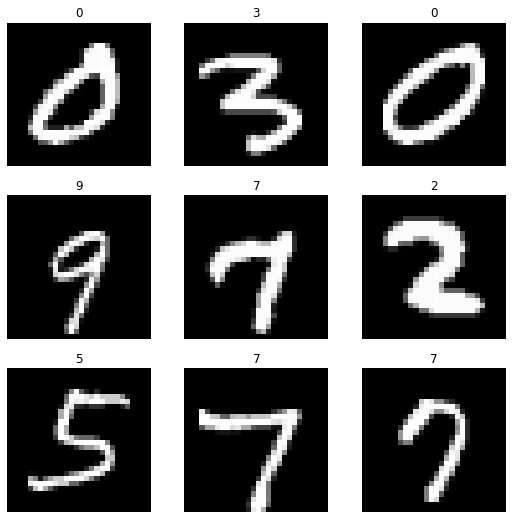

In [14]:
data.show_batch()

Als Modell dient ein einfaches neuronales Netz mit zwei vollständig verknüpften Layern ([nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)), die in der __init__-Methode initialisiert werden müssen.

Alle Schritte, die das Eingangssignal (das Bild der Ziffer), bis zum Outputsignal (10-er Array/Neuronen, korrespondierend zu 10 Ziffern) durchläuft werden in der forward-Methode definiert.

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.layer_1 = nn.Linear(3 * 28 * 28, 200) # 3*, da ein Rot-, Grün und Blau-Wert pro Pixel
        self.layer_2 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = torch.sigmoid(x)
        return x

model = Net()
print(model)

Net(
  (layer_1): Linear(in_features=2352, out_features=200, bias=True)
  (layer_2): Linear(in_features=200, out_features=10, bias=True)
)


Der [Learner](https://docs.fast.ai/learner.html) fasst die Daten und das Modell in ein handliches Objekt zusammen

Um den Lernprozess nachvollziehen zu können, wird die [accuracy](https://docs.fast.ai/metrics.html#accuracy) also der Anteil richtig klassifizierter Bilder als Metrik hinzugefügt

Mit .summary() wird eine lesbare Zusammenfassung des Learners ausgegeben.

Wie darin zu erkennen ist, wurde:

- der etablierte Optimierungsalgorithmus [Adam](https://docs.fast.ai/optimizer.html#Adam) standardmäßig gesetzt
- als Loss-Funktion automatisch der [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) gewählt, wie es für Klassifikationsaufgaben vernünftig ist

In [16]:
learn = Learner(data, model, metrics=accuracy)
print(learn.summary())

Net (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 200            
Linear                                    470600     True      
____________________________________________________________________________
                     64 x 10             
Linear                                    2010       True      
____________________________________________________________________________

Total params: 472,610
Total trainable params: 472,610
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7fd14d675430>
Loss function: FlattenedLoss of CrossEntropyLoss()

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback


Mit [.fit](https://docs.fast.ai/learner.html#Learner.fit) wird das Training mit 3 Epochen und einer Learning Rate von $1 * 10^{-2}$ durchgeführt

In [17]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.536071,1.524304,0.914500,00:04
1,1.530900,1.522887,0.905000,00:03
2,1.520438,1.528125,0.891700,00:04


Mit [.recorder.plot_loss()](https://docs.fast.ai/learner.html#Recorder) kann die Lernkurve geplottet werden

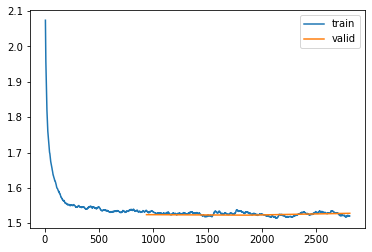

In [18]:
learn.recorder.plot_loss()


Mit [.show_results()](https://docs.fast.ai/learner.html#Learner.show_results) werden ein paar Beispielbilder aus dem Validierungsdatensatz inkl. vorhergesagtem und tatsächlichem Label dargestellt

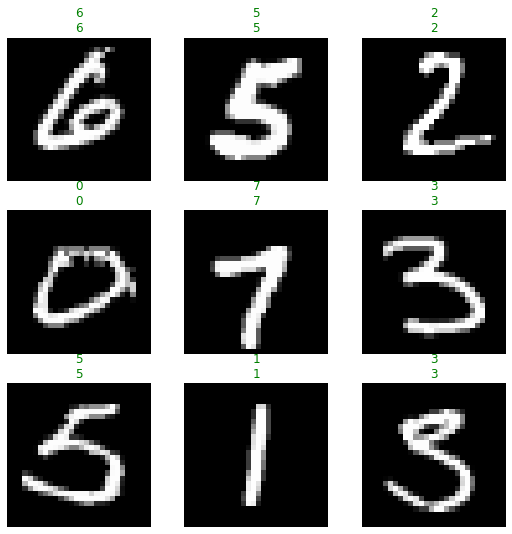

In [19]:
learn.show_results()
